In [24]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter
import seaborn as sns 
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#print("All imports successful!")

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # to change job skill list into data type

In [ ]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

In [25]:
#only get data analyst job in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') &(df['job_country'] == 'United States')].copy()

#Drop NaN values from the 'salary_year_avg column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [26]:
df_DA_US_group = df_DA_US.groupby('job_skills') ['salary_year_avg'].agg(['count', 'median'])

In [27]:
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [28]:
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

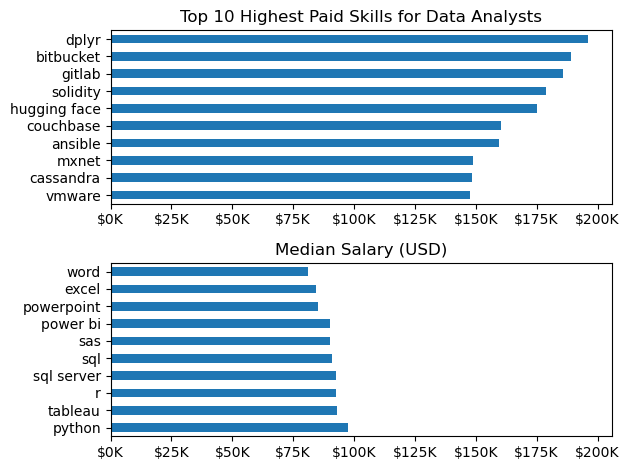

In [29]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

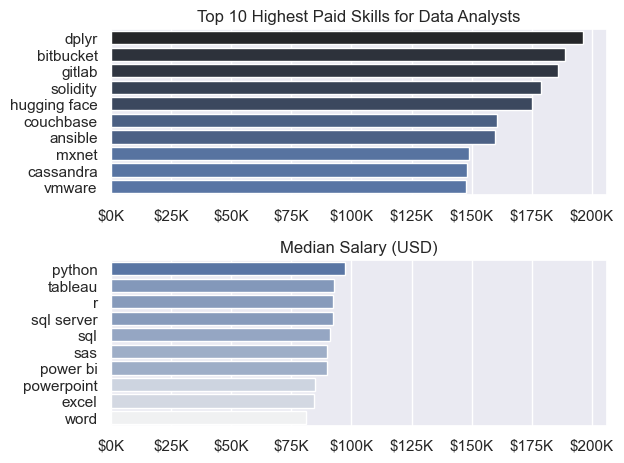

In [37]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_title('Median Salary (USD)')
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

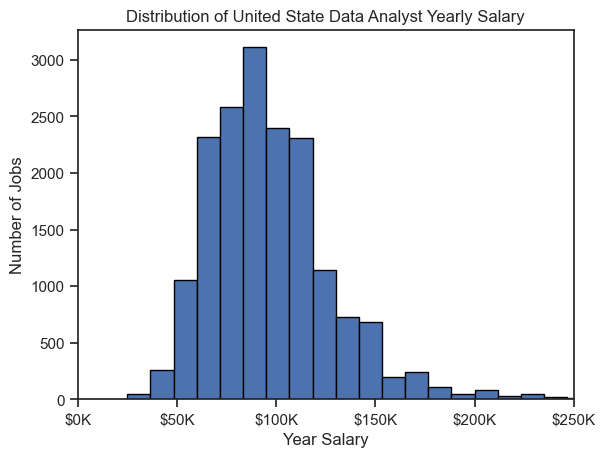

In [38]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of United State Data Analyst Yearly Salary')
plt.xlabel('Year Salary')
plt.ylabel('Number of Jobs')
plt.show()

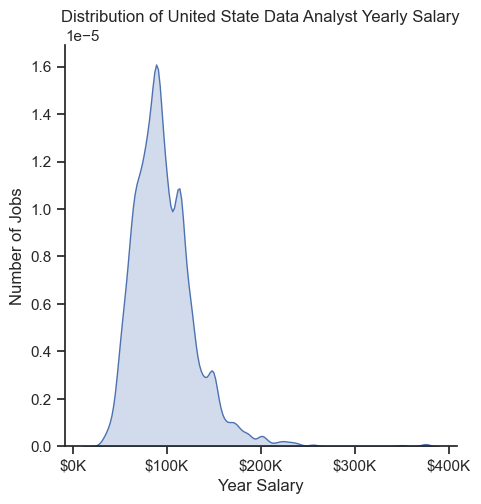

In [41]:

sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of United State Data Analyst Yearly Salary')
plt.xlabel('Year Salary')
plt.ylabel('Number of Jobs')
plt.show()

C:\Users\menbe\AppData\Local\Temp\ipykernel_20108\3244408879.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False )


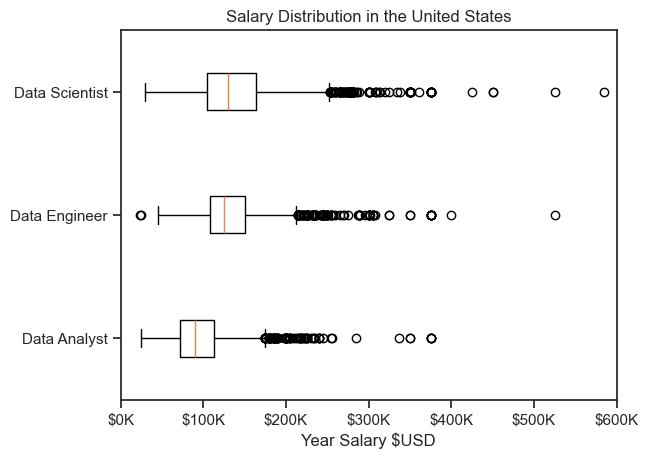

In [42]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

#filter the data to appropriate job_title
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False )
plt.title('Salary Distribution in the United States')
plt.xlabel('Year Salary $USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

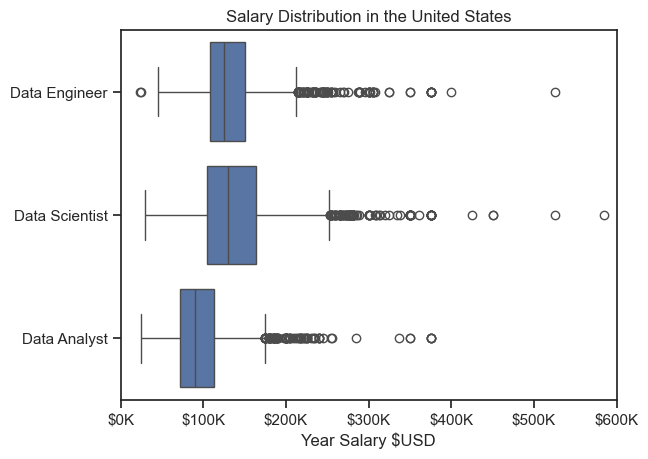

In [45]:
#.boxplot(job_list, labels=job_titles, vert=False )
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Year Salary $USD')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()